In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

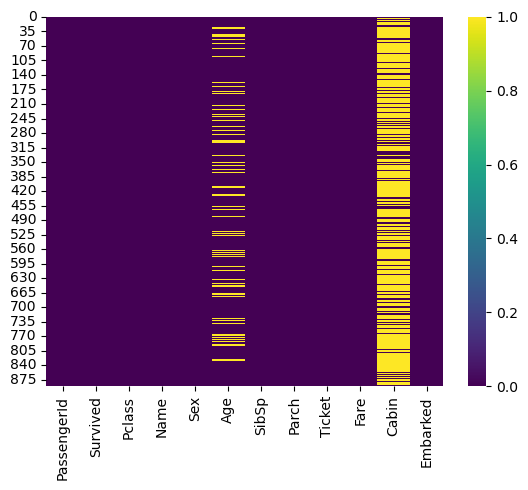

In [6]:
sns.heatmap(train.isnull(),cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

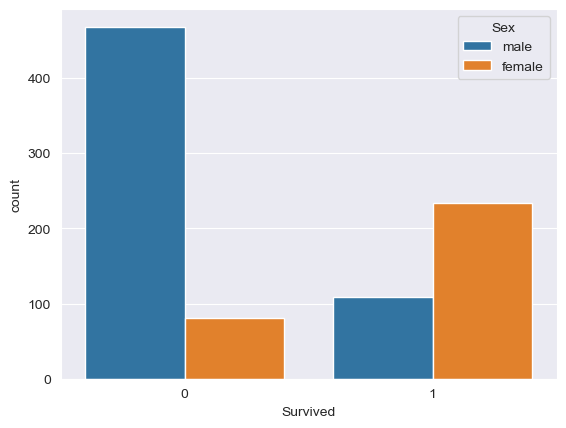

In [7]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived', hue = 'Sex', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

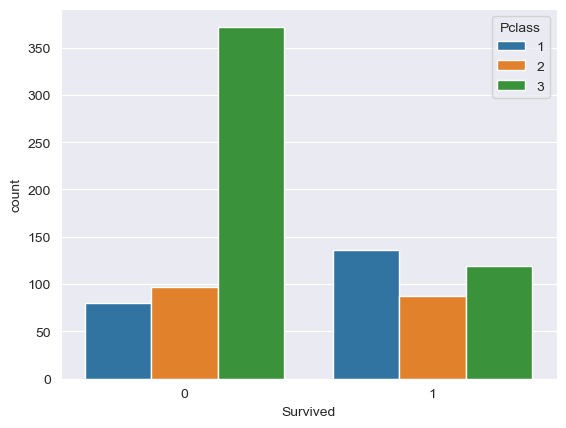

In [9]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived', hue = 'Pclass', data= train)

C:\Users\LENOVOi7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

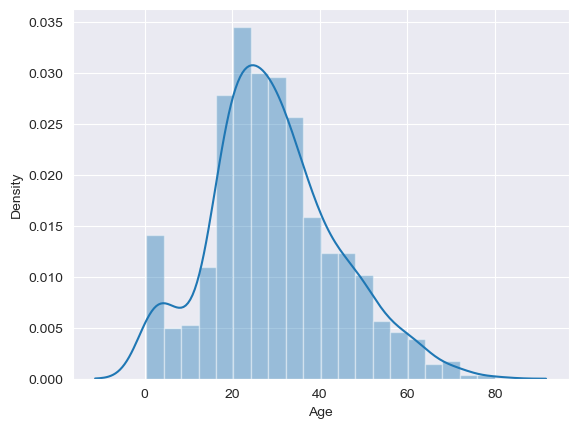

In [13]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Age'>

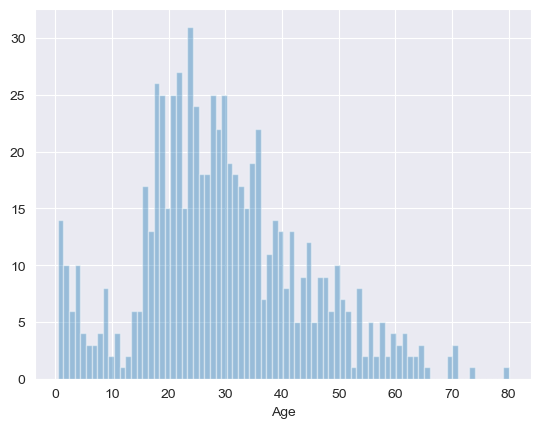

In [17]:
sns.distplot(train['Age'].dropna(), kde = False, bins=80)

In [18]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

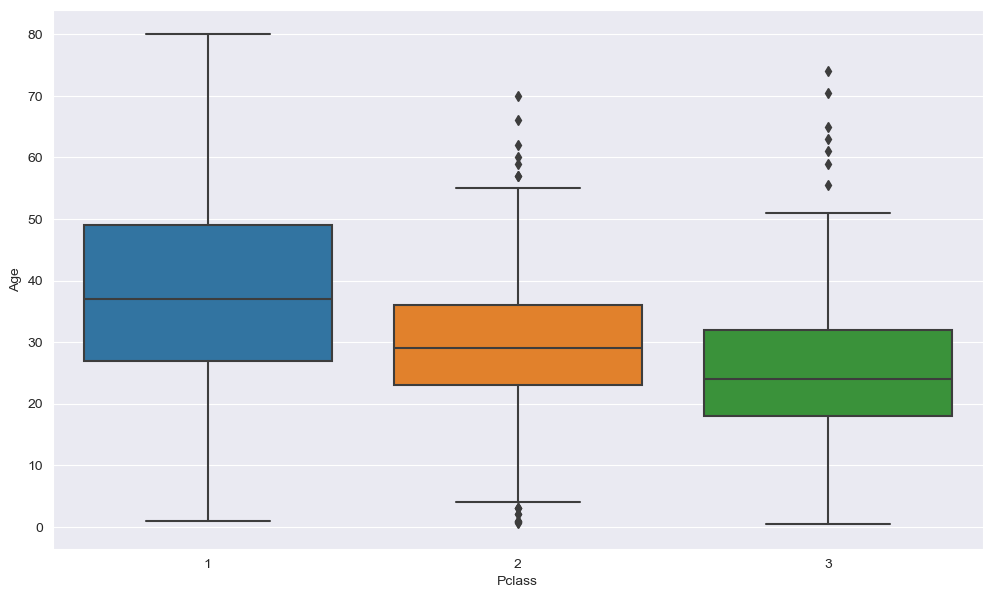

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data = train)

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 24
        else:
            return 24
    else:
        return Age

In [10]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

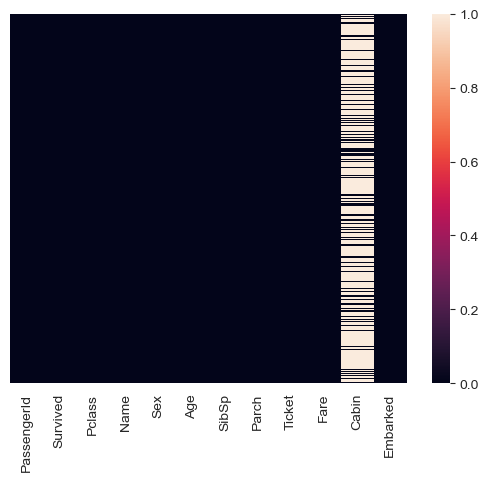

In [11]:
sns.heatmap(train.isnull(), yticklabels=False)

In [12]:
train.drop('Cabin', axis = 1, inplace = True)

<AxesSubplot:>

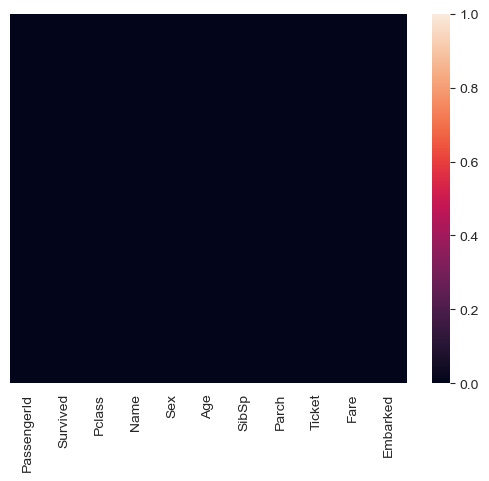

In [13]:
sns.heatmap(train.isnull(), yticklabels=False)

In [15]:
pd.get_dummies(train['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [19]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
train.drop(['Sex', 'Embarked', 'Name','Ticket'], axis =1, inplace= True)

In [24]:
train = pd.concat([train, sex, embark], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size =0.3, random_state = 41)


In [41]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='liblinear', random_state=0, max_iter = 250)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=250, random_state=0, solver='liblinear')

In [46]:
pred = logr.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, pred)

In [47]:
conf_matrix

array([[148,  14],
       [ 34,  72]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)

In [49]:
accuracy

0.8208955223880597

<AxesSubplot:>

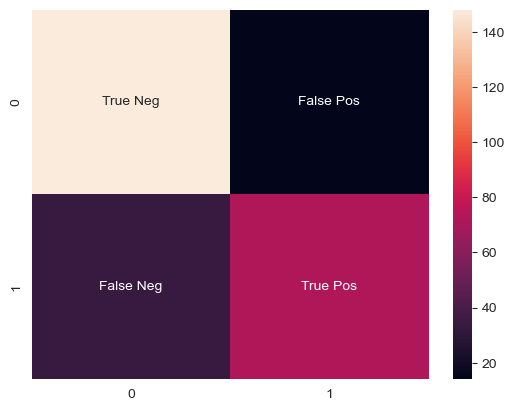

In [55]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix,annot=labels,fmt='' )